In [1]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_data = load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target

In [7]:
X.shape

(569, 30)

In [8]:
Y.shape

(569,)

In [10]:
print('Label names:', cancer_data.target_names)

Label names: ['malignant' 'benign']


In [11]:
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()

In [15]:
print(f'{n_pos} positive samples and {n_neg} negative samples.')

357 positive samples and 212 negative samples.


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=42)

In [17]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=42)

In [18]:
clf.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [19]:
accuracy = clf.score(X_test,Y_test)
print(f'The accuracy is {accuracy*100:.1f}%')

The accuracy is 95.8%


### SVM with more than 2 classes

In [20]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target

In [21]:
print('Input data size :', X.shape)

Input data size : (178, 13)


In [22]:
print('Output data size :', Y.shape)

Output data size : (178,)


In [23]:
print('Label names:', wine_data.target_names)

Label names: ['class_0' 'class_1' 'class_2']


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=42)

In [26]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [27]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 97.8%


In [28]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)

In [29]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [30]:
pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2])

In [31]:
Y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

### Illustrating RBF

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X = np.c_[
    #negative class
    (.3, -.8),
    (-1.5, -1),
    (-1.3, -.8),
    (-1.1, -1.3),
    (-1.2, -.3),
    (-1.3, -.5),
    (-.6, 1.1),
    (-1.4, 2.2),
    # positive class
    (1, 1),
    (1.3, .8),
    (1.2, .5),
    (.2, -2),
    (.5, -2.4),
    (.2, -2.3),
    (0, -2.7),
    (1.3, 2.1)
].T

In [36]:
Y = [-1] * 8 + [1] * 8
Y

[-1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1]

In [40]:
gamma_option = [1,2,4]

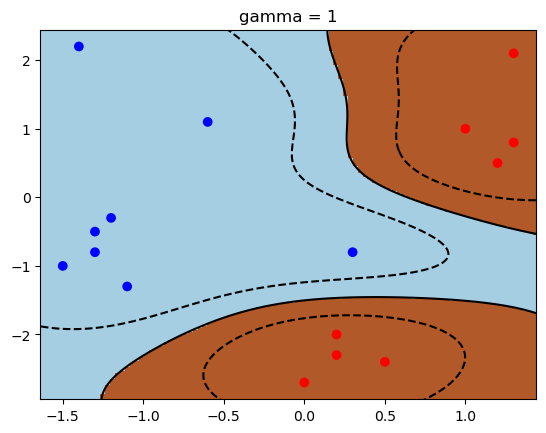

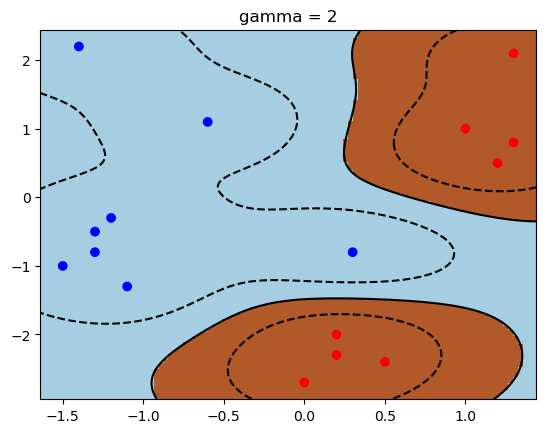

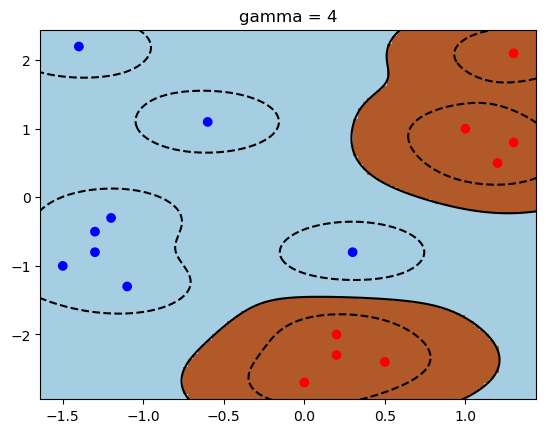

In [44]:
for i,gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X,Y)
    plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8, zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    XX,YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k']
                ,linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)
    plt.show()